<a href="https://colab.research.google.com/github/KSharif/Deep_learning/blob/main/Kidney_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.94      1.00      0.97        50

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

Logistic Regression ROC AUC Score: 0.9793333333333334


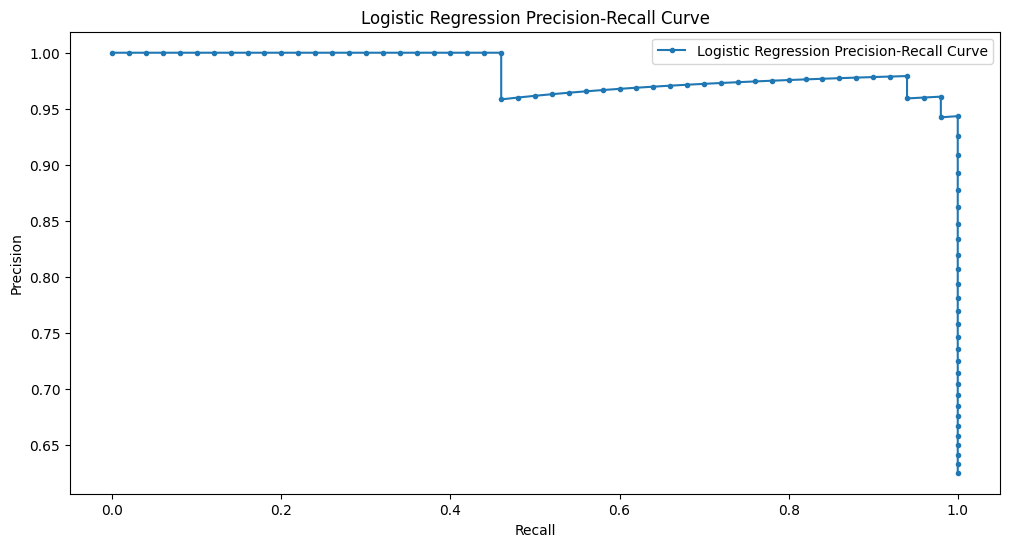

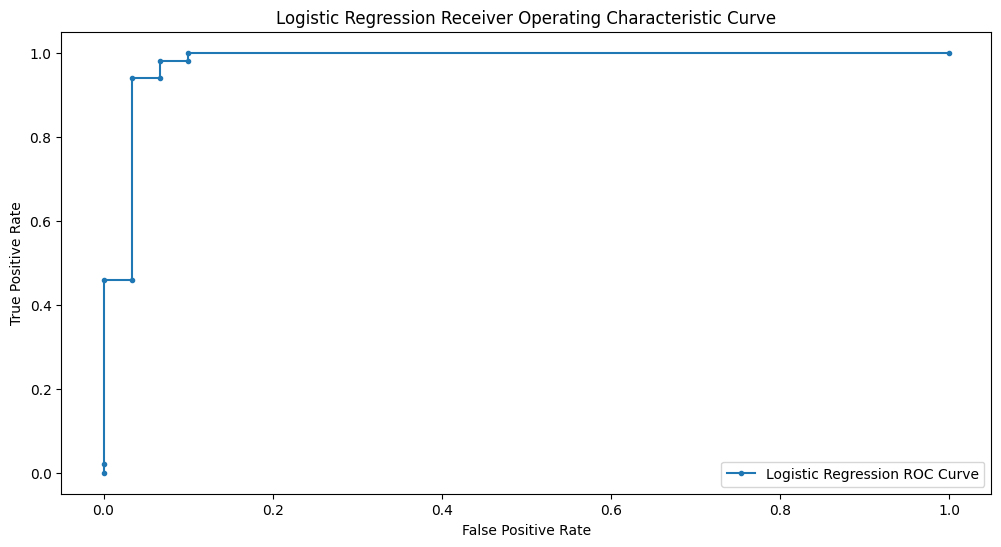


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Support Vector Machine ROC AUC Score: 0.982


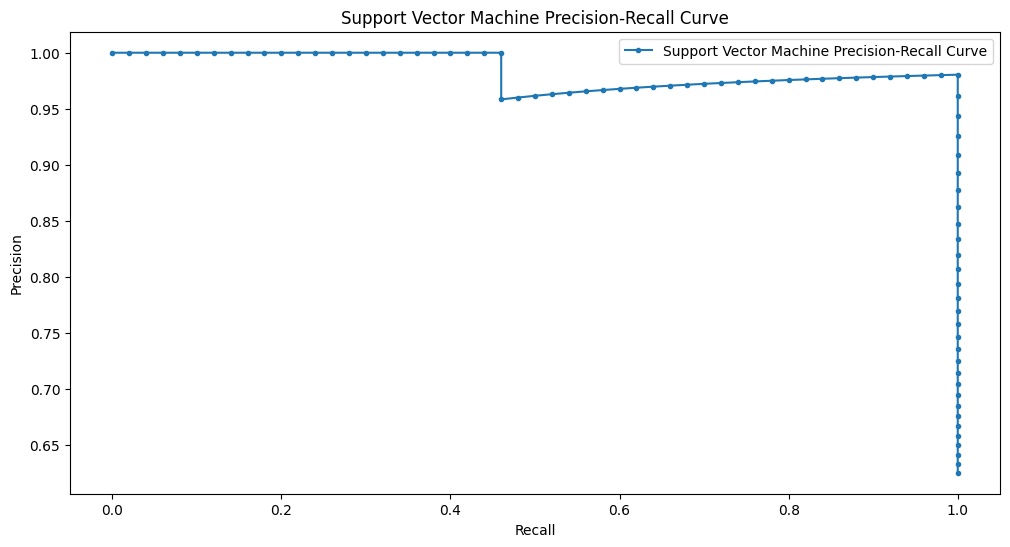

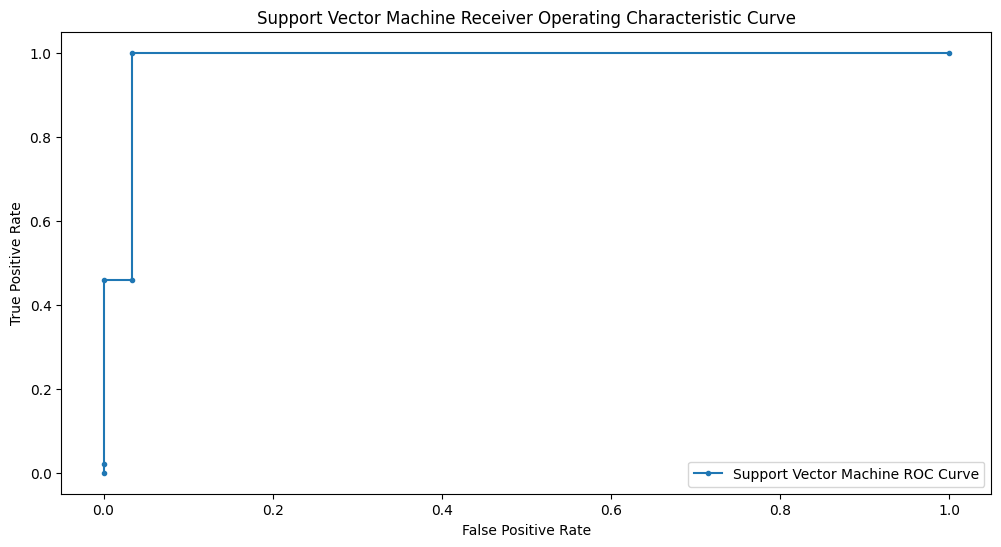


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.94      0.98      0.96        50

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80

Decision Tree ROC AUC Score: 0.9400000000000001


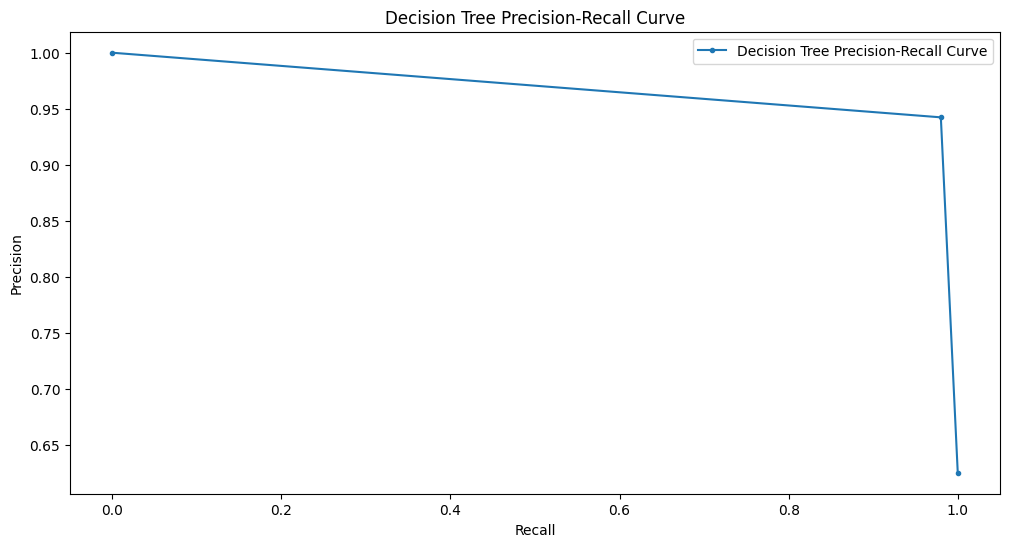

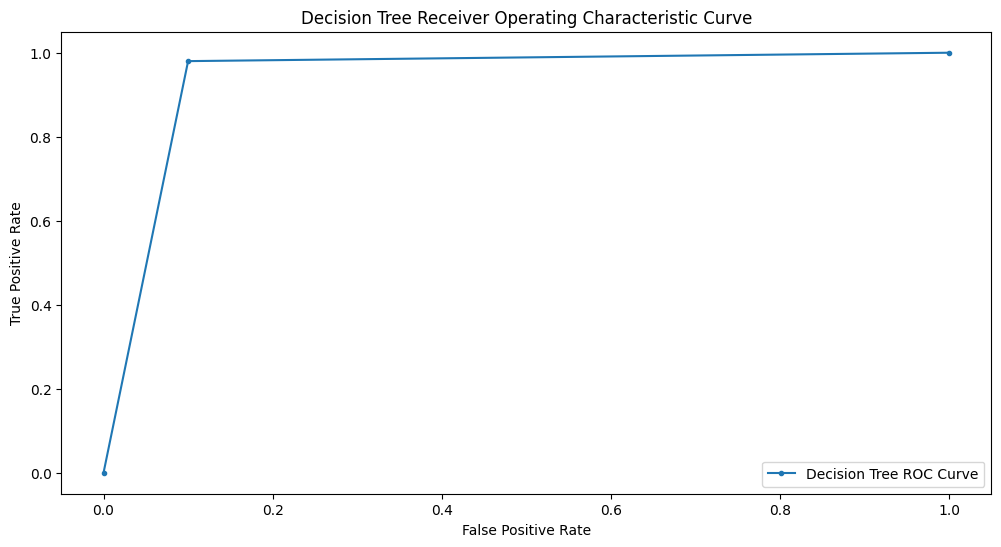


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Random Forest ROC AUC Score: 0.9846666666666667


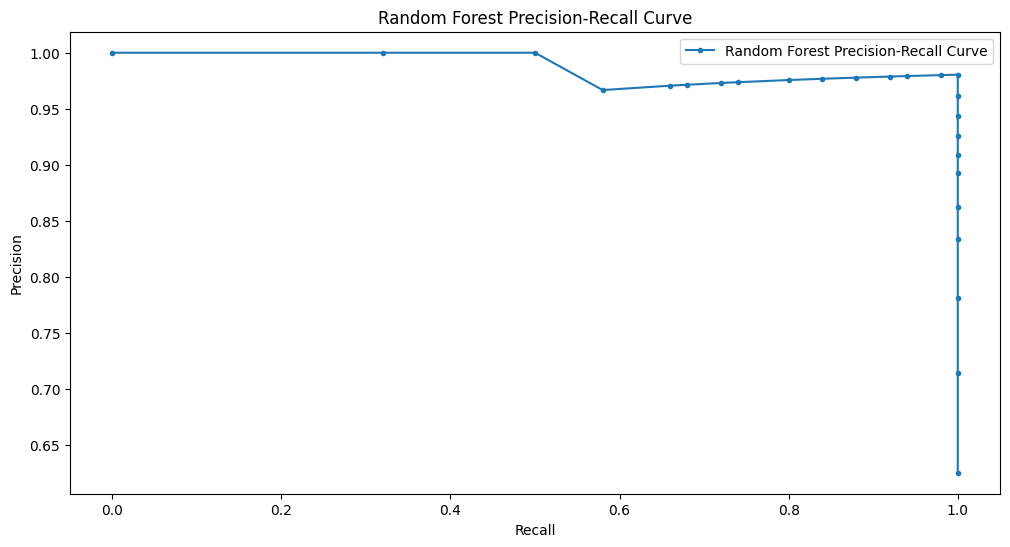

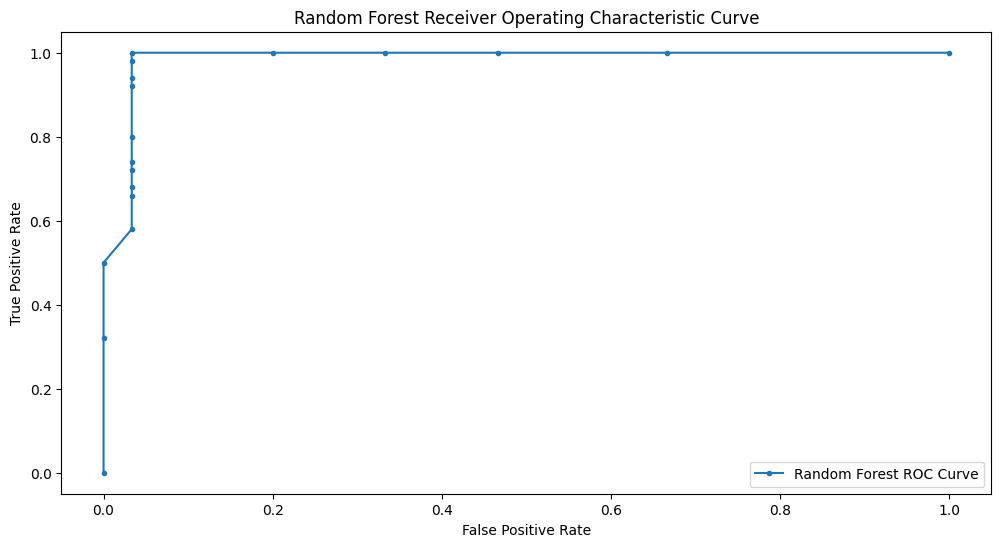

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Fetch the Chronic Kidney Disease dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Extract features and target
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# Convert target to binary (1: CKD, 0: Not CKD)
y = y['class'].map(lambda x: 1 if x.lower() == 'ckd' else 0).values  # Convert to a NumPy array

# Data Preprocessing
# Impute missing values with the most frequent strategy for categorical data
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize Shallow Learning Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Evaluation Metrics
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Plotting Precision-Recall and ROC curves
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name} Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


# **CODES FROM HERE**

<ipython-input-14-35558f852c94>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


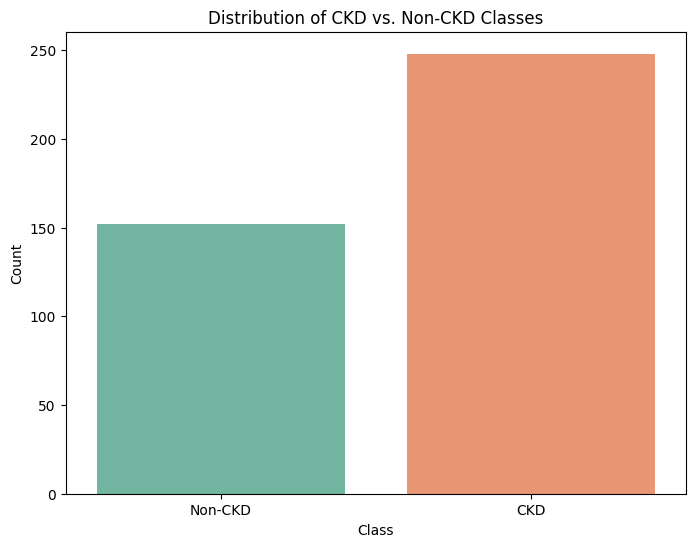

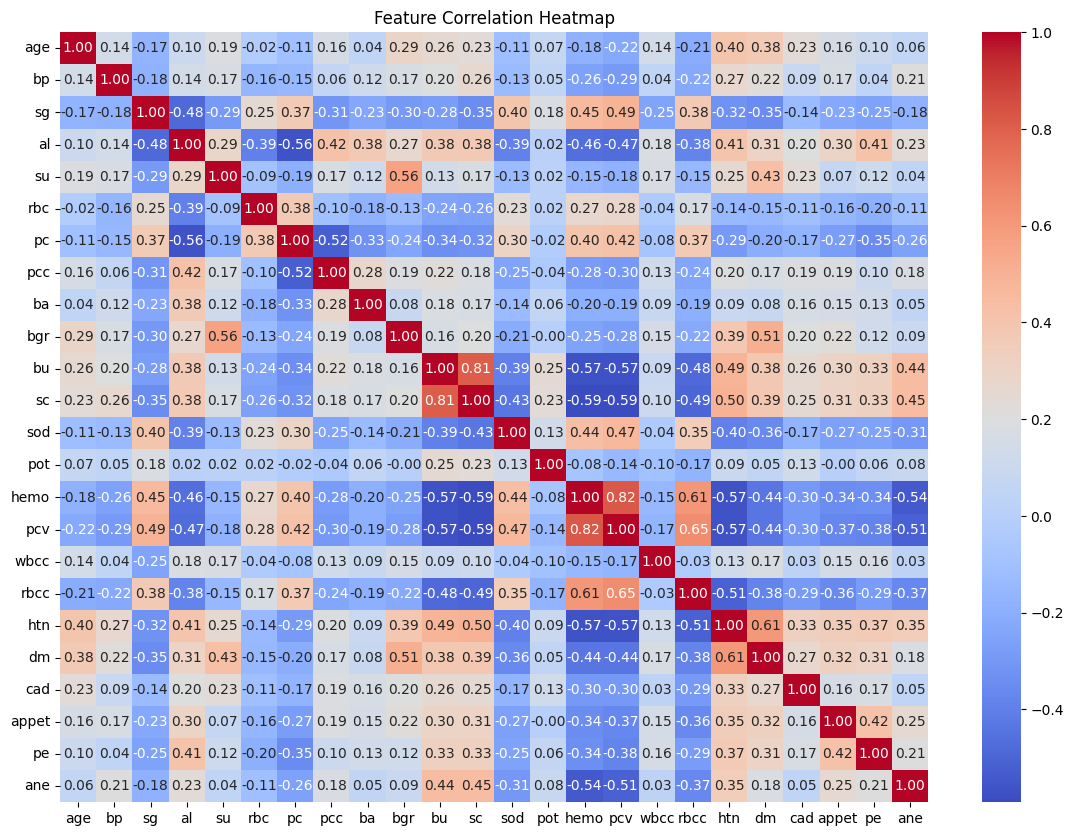

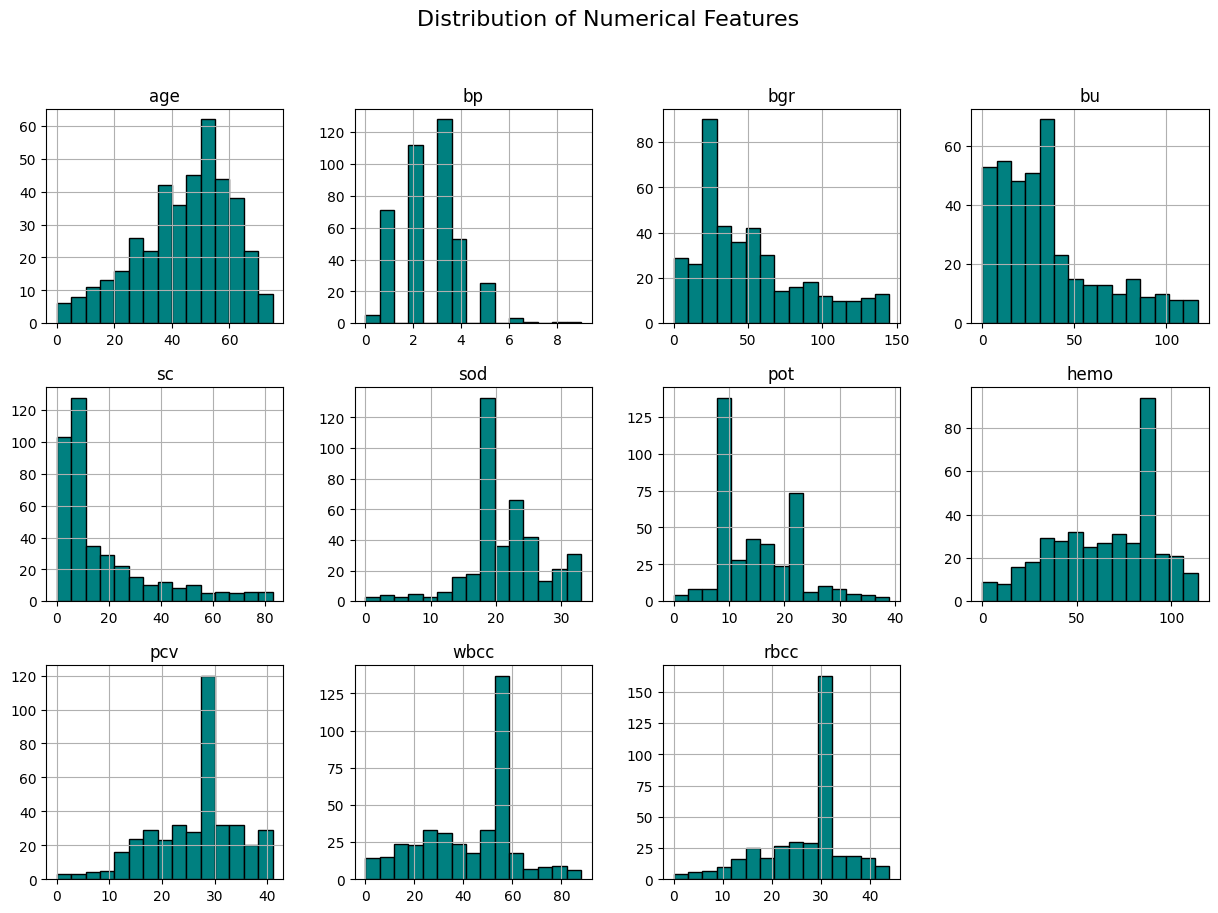


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.94      1.00      0.97        50

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

Logistic Regression ROC AUC Score: 0.9793333333333334


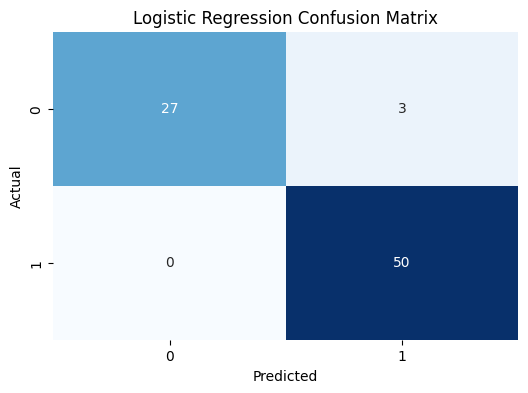

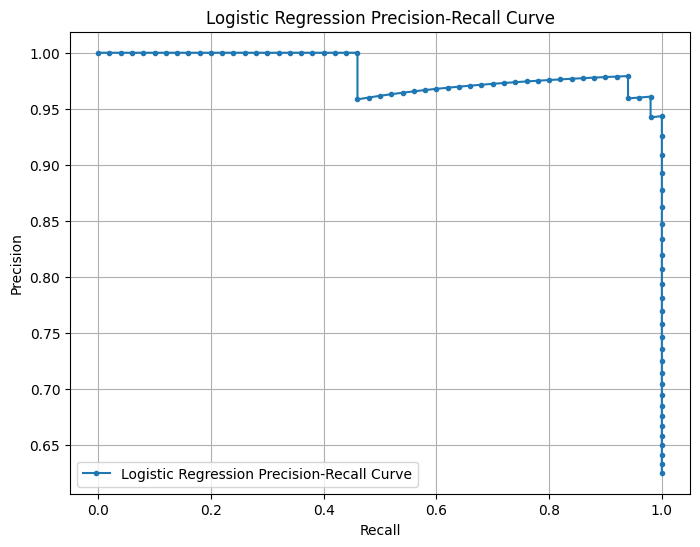

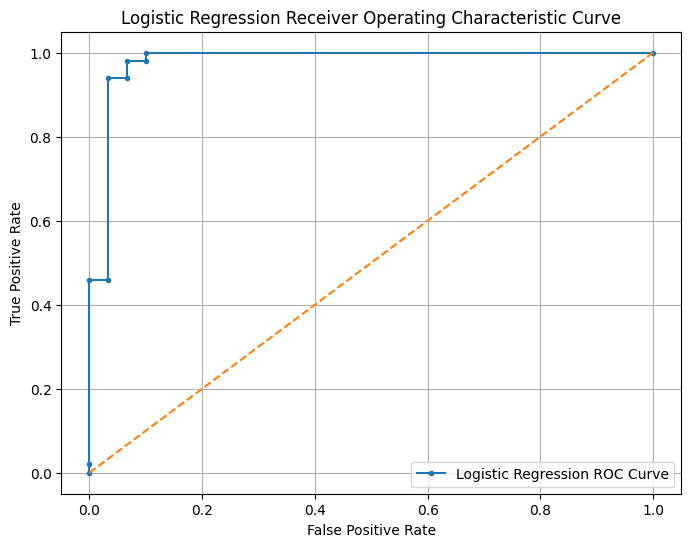


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Support Vector Machine ROC AUC Score: 0.982


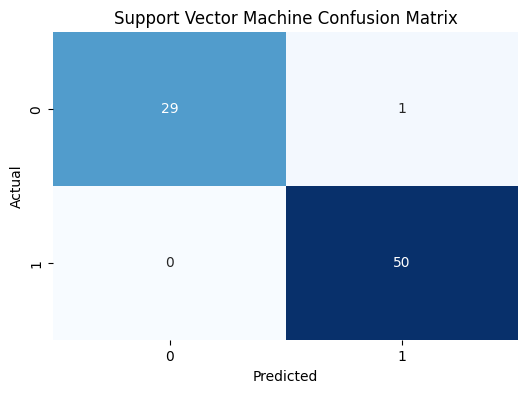

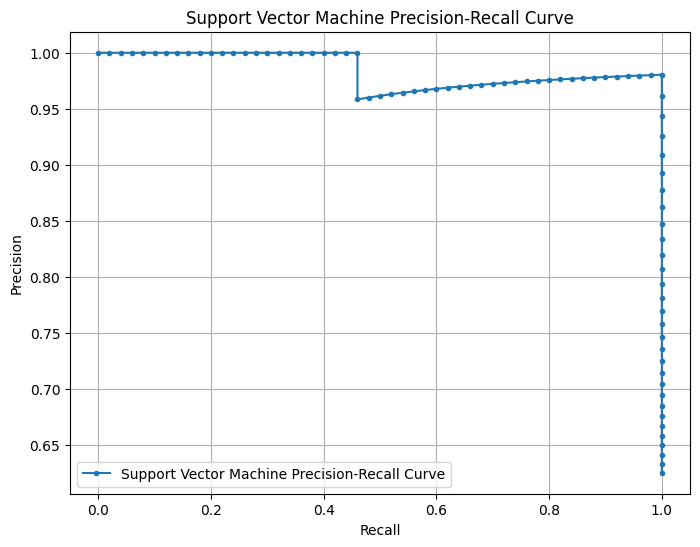

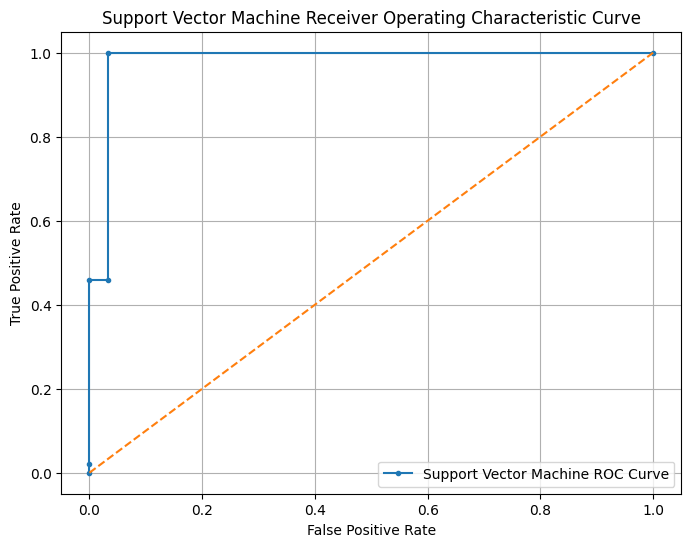


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.94      0.98      0.96        50

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80

Decision Tree ROC AUC Score: 0.9400000000000001


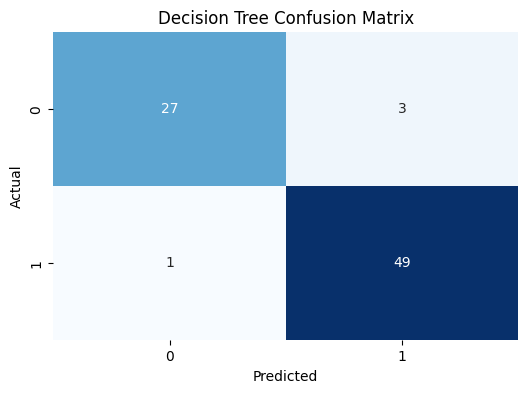

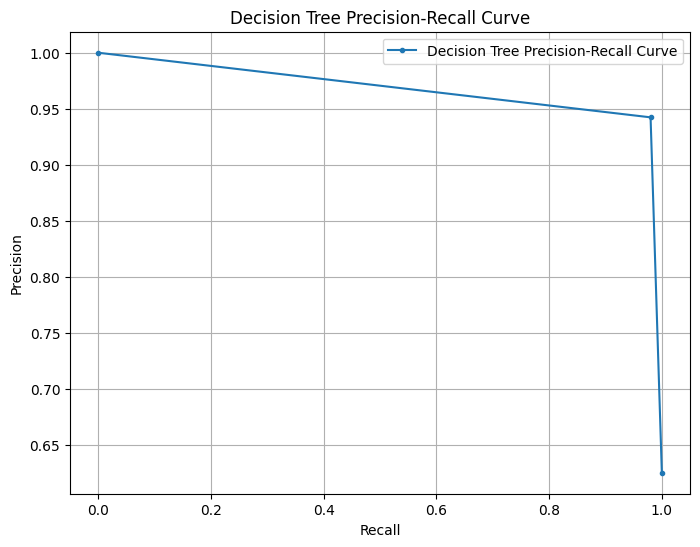

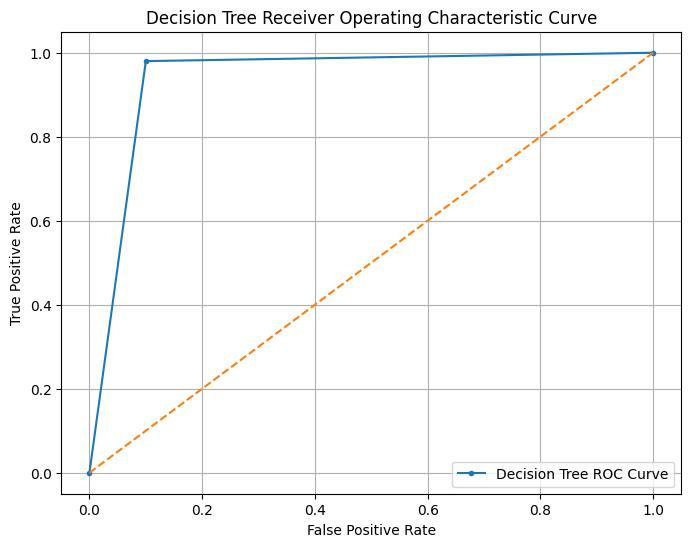

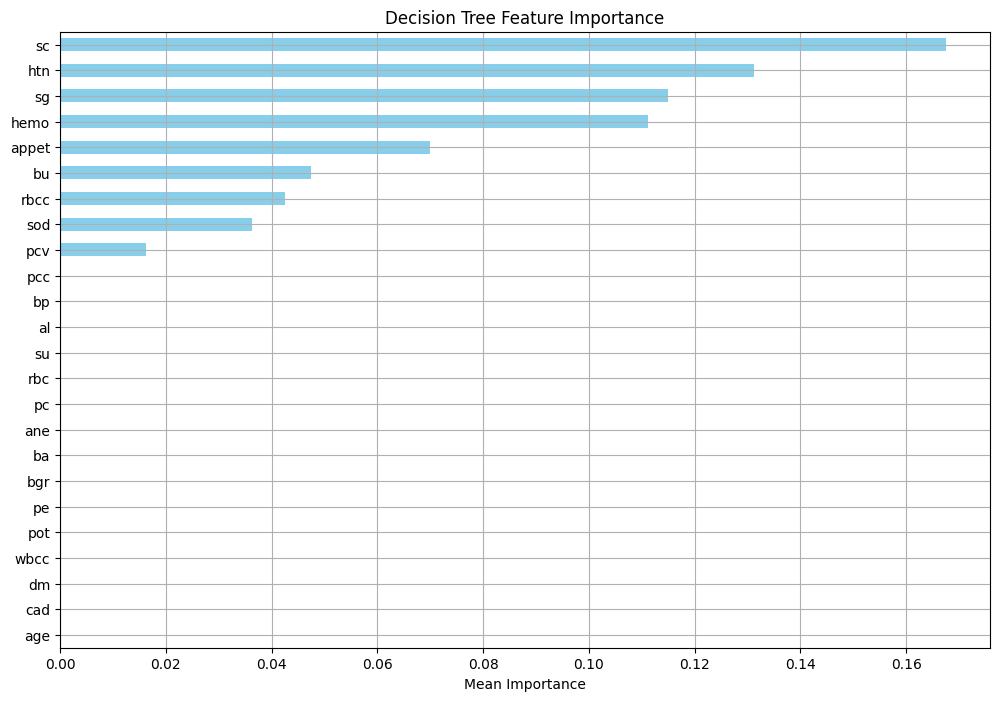


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Random Forest ROC AUC Score: 0.9846666666666667


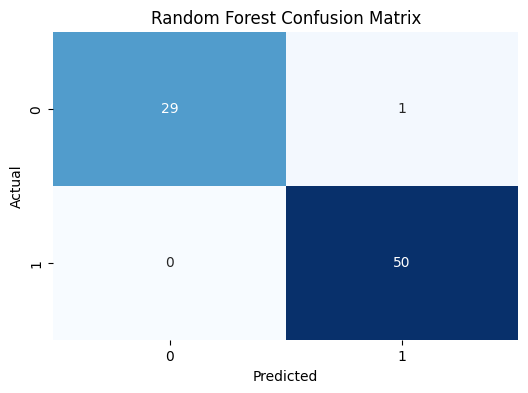

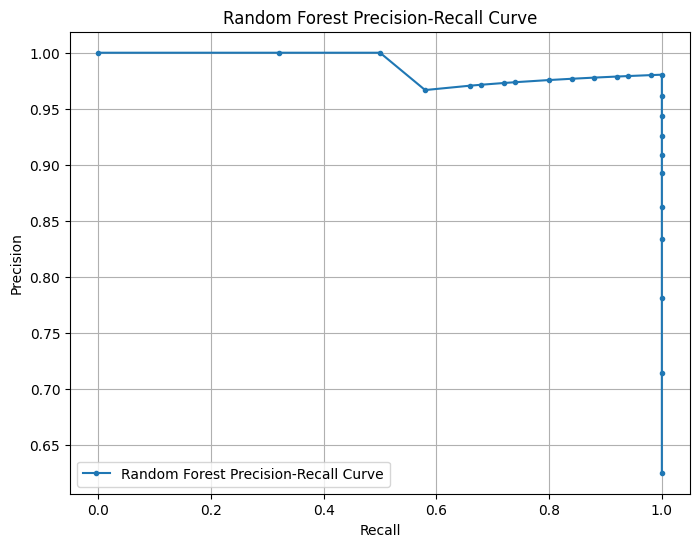

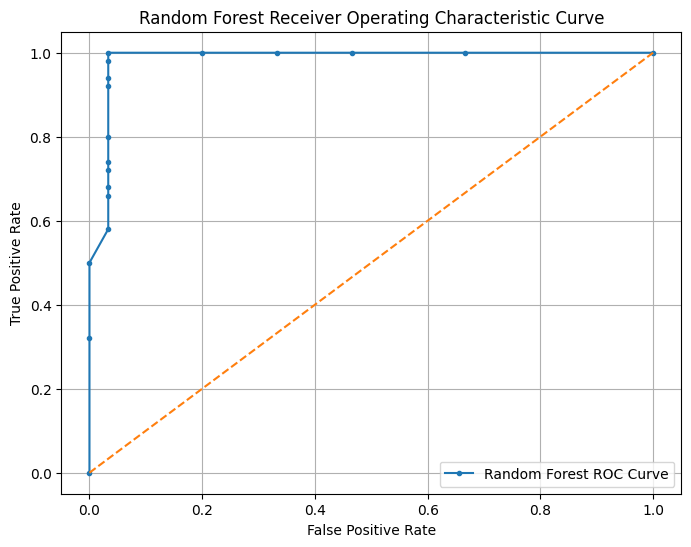

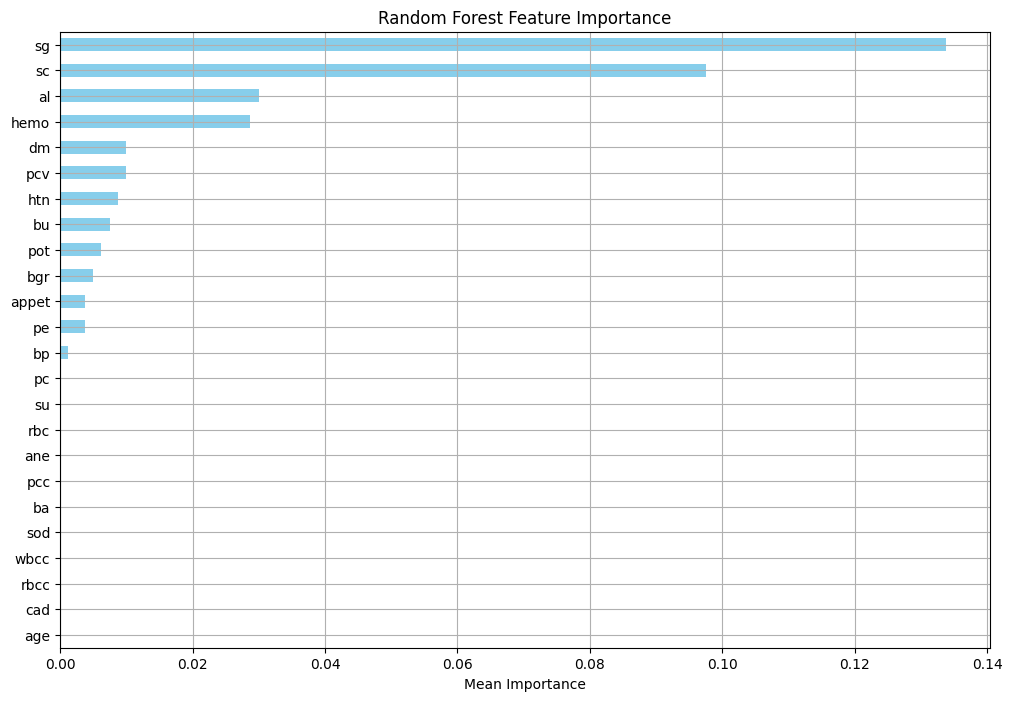

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Fetch the Chronic Kidney Disease dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Extract features and target
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# Convert target to binary (1: CKD, 0: Not CKD)
y = y['class'].map(lambda x: 1 if x.lower() == 'ckd' else 0).values  # Convert to a NumPy array

# Data Preprocessing
# Impute missing values with the most frequent strategy for categorical data
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.title('Distribution of CKD vs. Non-CKD Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-CKD', 'CKD'])
plt.show()

# Visualize Feature Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize Distribution of Key Numerical Features
numerical_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
X[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 4), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# Initialize Shallow Learning Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Evaluation Metrics
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} ROC AUC Score:", roc_auc_score(y_test, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plotting Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name} Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Feature Importance (for Tree-based models)
    if model_name in ['Decision Tree', 'Random Forest']:
        importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
        feature_importances = pd.Series(importance.importances_mean, index=X.columns)
        feature_importances.sort_values().plot(kind='barh', figsize=(12, 8), color='skyblue')
        plt.title(f'{model_name} Feature Importance')
        plt.xlabel('Mean Importance')
        plt.grid()
        plt.show()
